# Aerofit Case Study

### Problem Statement:
Analyzing Aerofit's customer data, which includes Gender, Age, Education, Income, Weekly Usage, Fitness, Marital Status, and Miles run on the treadmill. The aim is to identify trends in treadmill purchases (KP281, KP481, KP781 based on increasing expenditures). Following this analysis, personalized recommendations can be made for future customers.

### Basic Overview of Dataset

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# downloading the dataset

! gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
To: C:\Users\Nisha Pandit\Mohit_Intermediate 1_python_Refresher_1\aerofit_treadmill.csv

  0%|          | 0.00/7.28k [00:00<?, ?B/s]
100%|##########| 7.28k/7.28k [00:00<00:00, 7.15MB/s]


In [3]:
# read the csv file

df = pd.read_csv('aerofit_treadmill.csv')

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
# Shape of data

df.shape

(180, 9)

In [6]:
# data type of all columns is as follows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [8]:
# From the above observation, we can conclude that only Income, Miles and Age can be considered as Continuous
# changing fitness, education and usage column to categorical features

df['Fitness'] = df['Fitness'].astype('object')
df['Usage'] = df['Usage'].astype('object')
df['Education'] = df['Education'].astype('object')

In [9]:
df.describe()

,Age,Income,Miles
count,180.000000,180.000000,180.000000
mean,28.788889,53719.577778,103.194444
std,6.943498,16506.684226,51.863605
min,18.000000,29562.000000,21.000000
25%,24.000000,44058.750000,66.000000
50%,26.000000,50596.500000,94.000000
75%,33.000000,58668.000000,114.750000
max,50.000000,104581.000000,360.000000


In [10]:
df.describe(include = object)

,Product,Gender,Education,MaritalStatus,Usage,Fitness
count,180,180,180,180,180,180
unique,3,2,8,2,6,5
top,KP281,Male,16,Partnered,3,3
freq,80,104,85,107,69,97


In [11]:
# missing values

df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [12]:
# Distribution across the categorical variables

for i in ['Product', 'Gender', 'MaritalStatus', 'Usage', 'Fitness', 'Education']:
    y = df[i].value_counts()
    print (y, '\n')

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 

Male      104
Female     76
Name: Gender, dtype: int64 

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64 

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64 

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64 



### Detecting outliers

Text(0.5, 1.0, 'Outliers in Miles')

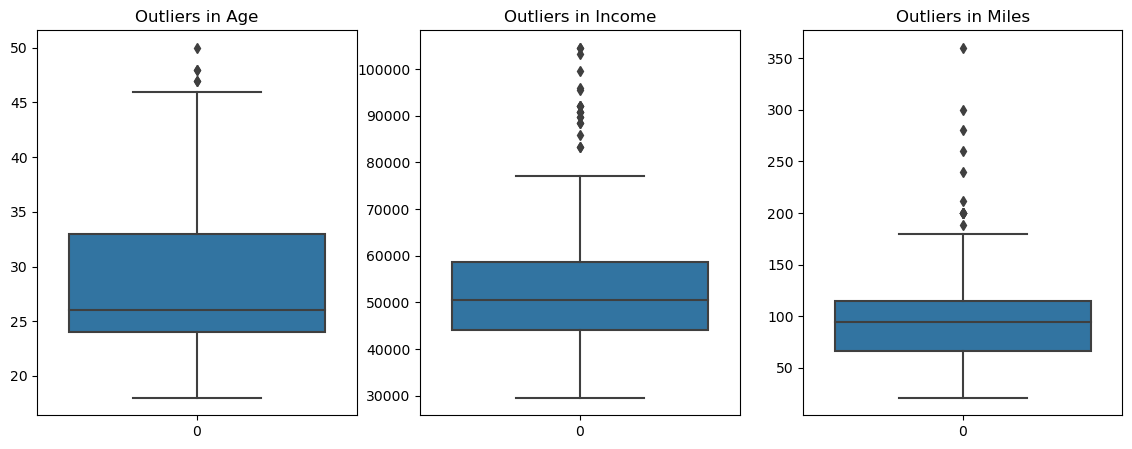

In [13]:
# Set up the plotting area
plt.figure(figsize=(14,5))

plt.subplot(1,3 , 1)
sns.boxplot(data = df['Age'])
plt.title("Outliers in Age")

plt.subplot(1, 3, 2)
sns.boxplot(data = df['Income'])
plt.title("Outliers in Income")

plt.subplot(1, 3, 3)
sns.boxplot(data = df['Miles'])
plt.title("Outliers in Miles")

#####
In our small dataset of 180 rows, we're using data clipping—keeping values between the 5th and 95th percentiles—to handle outliers. This maintains data reliability without losing information.

In [14]:
#  Data Clipping of 5th percentile and 95th percentile values
#  Data Clipping for 'Age' column

# Choose the column to clip 
column_to_clip = 'Age'

# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(df[column_to_clip], 5)
percentile_95 = np.percentile(df[column_to_clip], 95)

# Clip the data between the 5th and 95th percentiles
clipped_data_age = np.clip(df[column_to_clip], percentile_5, percentile_95)

In [15]:
#  Data Clipping for 'Income' column

# Choose the column to clip 
column_to_clip = 'Income'

# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(df[column_to_clip], 5)
percentile_95 = np.percentile(df[column_to_clip], 95)

# Clip the data between the 5th and 95th percentiles
clipped_data_inc = np.clip(df[column_to_clip], percentile_5, percentile_95)

In [16]:
#  Data Clipping for 'Miles' column

# Choose the column to clip 
column_to_clip = 'Miles'

# Calculate the 5th and 95th percentiles
percentile_5 = np.percentile(df[column_to_clip], 5)
percentile_95 = np.percentile(df[column_to_clip], 95)

# Clip the data between the 5th and 95th percentiles
clipped_data_mile = np.clip(df[column_to_clip], percentile_5, percentile_95)

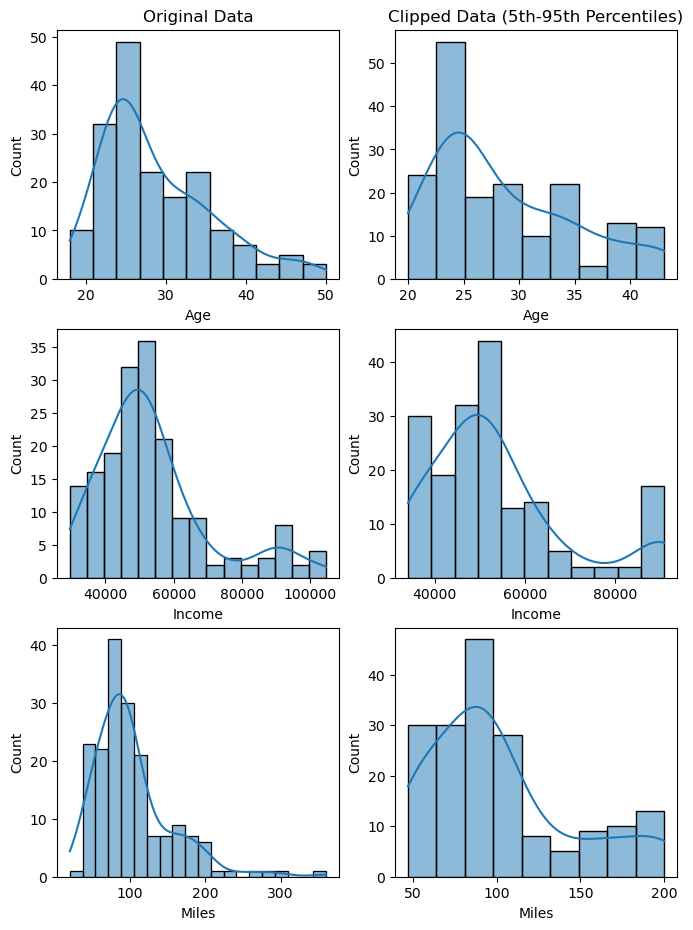

In [17]:
# Set up subplots
plt.figure(figsize=(8,11))

# Plot the original data for age
plt.subplot(3,2,1)
sns.histplot(df['Age'], kde=True)
plt.title("Original Data")

# Plot the clipped data for age
plt.subplot(3,2,2)
sns.histplot(clipped_data_age, kde=True)
plt.title("Clipped Data (5th-95th Percentiles)")

# Plot the original data for income
plt.subplot(3,2,3)
sns.histplot(df['Income'], kde=True)

# Plot the clipped data for income
plt.subplot(3,2,4)
sns.histplot(clipped_data_inc, kde=True)

# Plot the original data for miles
plt.subplot(3,2,5)
sns.histplot(df['Miles'], kde=True)

# Plot the clipped data for miles
plt.subplot(3,2,6)
sns.histplot(clipped_data_mile, kde=True)

# Show the plot
plt.show()

### Countplots for Analysis of Categorical Variables:

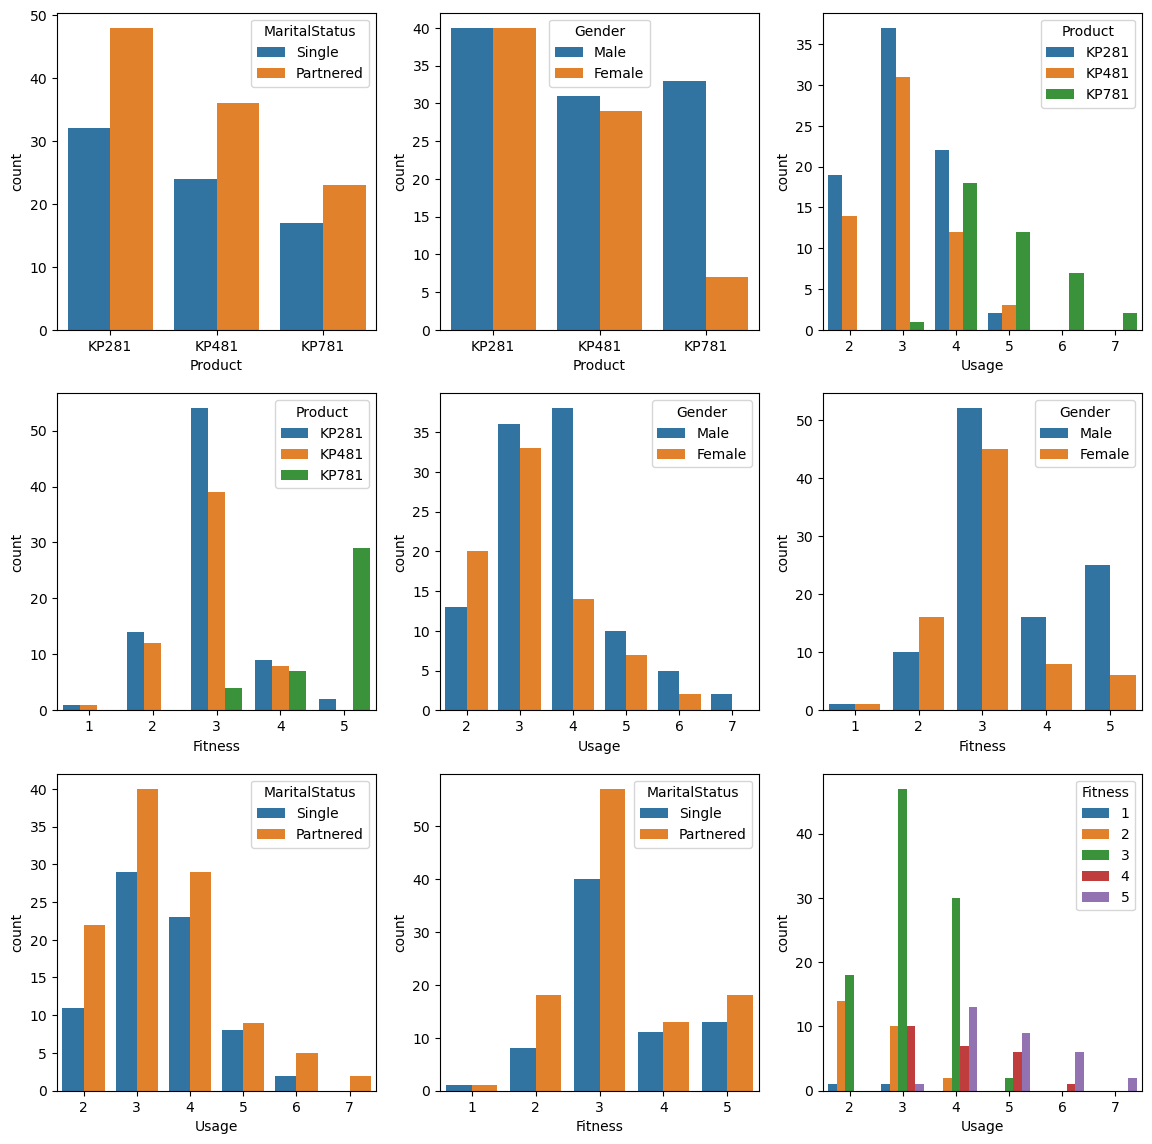

In [18]:
# Set up the plotting area
plt.figure(figsize=(14, 14))

# Create count plots for marital status and gender
plt.subplot(3, 3, 1)
sns.countplot(x='Product', hue='MaritalStatus', data=df)

plt.subplot(3, 3, 2)
sns.countplot(x='Product', hue='Gender', data=df)

plt.subplot(3, 3, 3)
sns.countplot(x='Usage', hue='Product', data=df)

plt.subplot(3, 3, 4)
sns.countplot(x='Fitness', hue='Product', data=df)

plt.subplot(3, 3, 5)
sns.countplot(x='Usage', hue='Gender', data=df)

plt.subplot(3, 3, 6)
sns.countplot(x='Fitness', hue='Gender', data=df)

plt.subplot(3, 3, 7)
sns.countplot(x='Usage', hue='MaritalStatus', data=df)

plt.subplot(3, 3, 8)
sns.countplot(x='Fitness', hue='MaritalStatus', data=df)

plt.subplot(3, 3, 9)
sns.countplot(x='Usage', hue='Fitness', data=df)

# Show the plots
plt.show()

##### Observations from graphs:
1. Irrespective of marital status people preferred purchasing KP281 more as compared to the other two categories.
2. People in a relationship preferred purchasing treadmiles more over single people
3. There isn't any significance diffrence in number of males buying KP281 and number of females buying the same category treadmill
4. Males preferred KP781 more as compared to females
5. Users who preferred KP281 and KP481 treadmill used it for 3 to 4 days a week
6. Users who preferred KP781 treadmill used it for 5 to 6 days a week
7. People having fitness rating of 3 have predominently preferred KP281 and KP481 treadmill
8. People having fitness rating of 5 have predominently preferred KP781 treadmill
9. Males are more active over a week as compared to females.
10. Number of males having a 5 star fitness ranking is more as compared to number of females having the same. In general trend males are more fit as compared to females.
11. Partenered people are more active and fit than single people.
12. Fitness ratings and treadmill usage over a week are directly related

### Scatter Plots for Analysis of Continuous Variables 

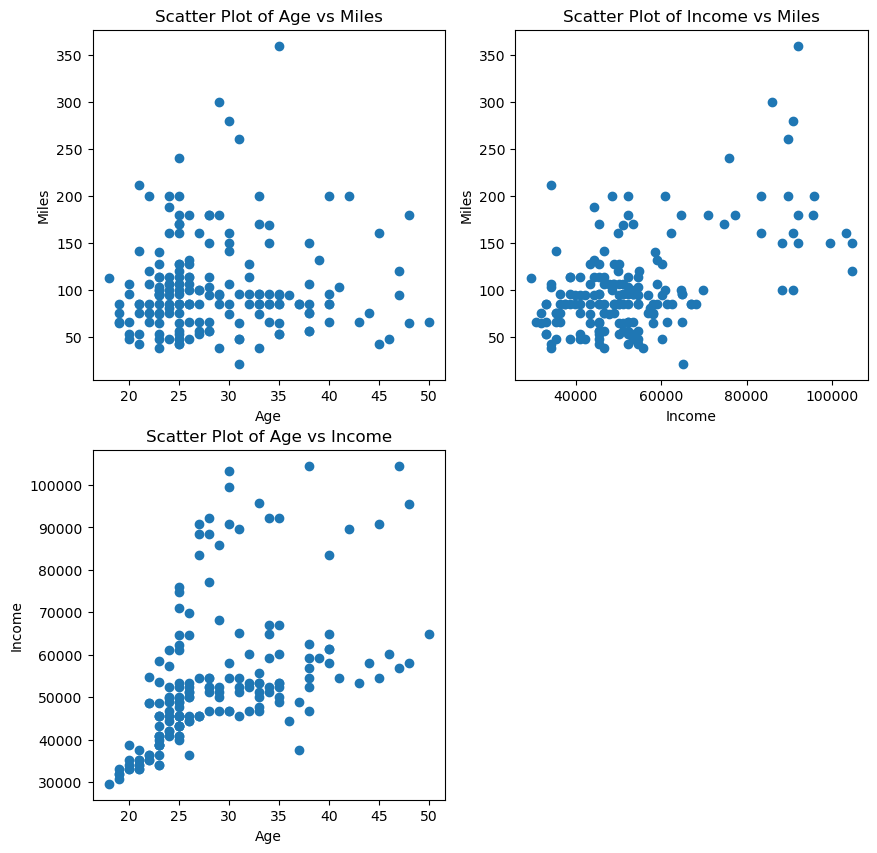

In [19]:
# Set up the plotting area
plt.figure(figsize=(10,10))

# Create count plots for marital status and gender
plt.subplot(2, 2, 1)
plt.scatter(df['Age'], df['Miles'])
plt.xlabel('Age')
plt.ylabel('Miles')
plt.title('Scatter Plot of Age vs Miles')

plt.subplot(2, 2, 2)
plt.scatter(df['Income'], df['Miles'])
plt.xlabel('Income')
plt.ylabel('Miles')
plt.title('Scatter Plot of Income vs Miles')

plt.subplot(2, 2, 3)
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs Income')

# Show the plots
plt.show()

#### Observations
1. The variance of income in lower ages is smaller as compared to the variance in higher ages
2. No significant pattern or observation between Age and Miles run on a treadmill.
3. The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles. 

### Probabilistic Representation

In [20]:
bins1 = [0, 22, 26, 30, 34, 38, 42, 46, 50]
labels1 = ['<=21', '22 to 25', '26 to 29', '30 to 33', '34 to 37', '38 to 41', '42 to 45', '46 to 50']

# Apply cut() function
df['Age_bins'] = pd.cut(df['Age'], bins=bins1, labels=labels1)

In [21]:
bins2 = [29000, 39000, 49000, 59000, 69000, 79000, 89000, 99000, 109000, 119000]
labels2 = ['29001 to 38999', '39000 to 48999', '49000 to 58999', '59000 to 68999', '69000 to 78999', '79000 to 88999', '89000 to 98999', '99000 to 109000', '109000 to 119000' ]

# Apply cut() function
df['income_bins'] = pd.cut(df['Income'], bins=bins2, labels=labels2)

In [22]:
bins3 = [21, 50, 100, 150, 200, 250, 300, 350, 400]
labels3 = ['21 to 50', '51 to 100', '101 to 150', '151 to 200', '201 to 250', '251 to 300', '301 to 350', '351 to 400' ]

# Apply cut() function
df['mile_bins'] = pd.cut(df['Miles'], bins=bins3, labels=labels3)

In [23]:
np.round(df['Product'].value_counts(normalize = True) * 100,2)

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

##### Marginal and Conditional Probability distribution for Product purchased and gender 

In [24]:
crosstab1 = pd.crosstab(df['Gender'], df['Product'])

In [25]:
marginal_prob = np.round(crosstab1/crosstab1.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
Gender,,,
Female,0.5,0.48,0.18
Male,0.5,0.52,0.82


Product  KP281  KP481  KP781
Gender                      
Female    0.53   0.38   0.09
Male      0.38   0.30   0.32


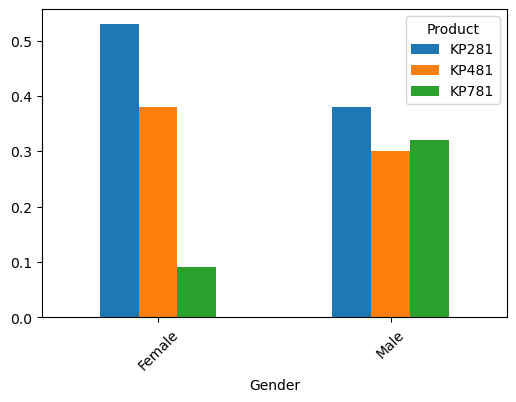

In [26]:
# Calculate conditional probability (P(Product | Gender))
conditional_prob = round(crosstab1.div(crosstab1.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (6,4))
plt.xticks(rotation=45)
plt.show()

In [27]:
# Alternate method to find conditional probability
# Calculate conditional probability (P(Product | Gender))
# conditional_prob = round(pd.crosstab(df['Gender'], df['Product'], margins=True, normalize='index'),2)
# print (conditional_prob)

Around 53% of women prefer KP281 and only 9% prefer KP781, while around 32% of men prefer KP781.

##### Marginal and Conditional Probability distribution for Product purchased and age

In [28]:
crosstab2 = pd.crosstab(df['Age_bins'], df['Product'])

In [29]:
marginal_prob = np.round(crosstab2 /crosstab2.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
Age_bins,,,
<=21,0.18,0.12,0.08
22 to 25,0.34,0.40,0.40
26 to 29,0.18,0.07,0.28
30 to 33,0.10,0.22,0.08
34 to 37,0.11,0.12,0.05
38 to 41,0.04,0.05,0.05
42 to 45,0.04,0.02,0.02
46 to 50,0.02,0.02,0.05


Product   KP281  KP481  KP781
Age_bins                     
<=21       0.58   0.29   0.12
22 to 25   0.40   0.36   0.24
26 to 29   0.48   0.14   0.38
30 to 33   0.33   0.54   0.12
34 to 37   0.50   0.39   0.11
38 to 41   0.38   0.38   0.25
42 to 45   0.60   0.20   0.20
46 to 50   0.40   0.20   0.40


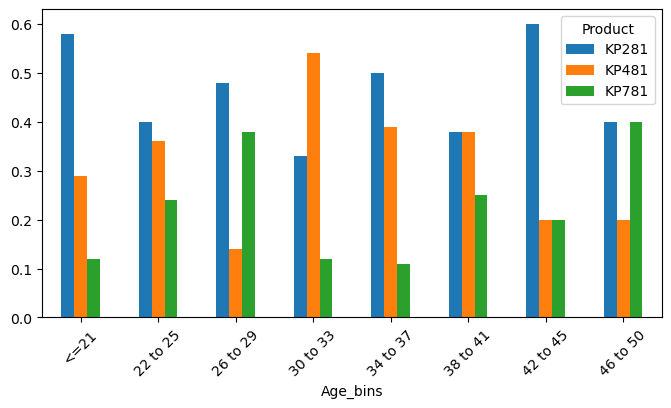

In [30]:
# Calculate conditional probability (P(Product | Age))
conditional_prob = round(crosstab2.div(crosstab2.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (8,4))
plt.xticks(rotation=45)
plt.show()

40 % of people from age group 46 to 50 and 38% of people from age group 26 to 29 years, preferred KP781.
60 % of people from age group 42 to 45 years, preferred KP281, 54% of people from age group 30 to 33 years preferred KP481

##### Marginal and Conditional Probability distribution for Product purchased and fitness ratings

In [31]:
crosstab3 = pd.crosstab(df['Fitness'], df['Product'])

marginal_prob = np.round(crosstab3 /crosstab3.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
Fitness,,,
1,0.01,0.02,0.00
2,0.18,0.20,0.00
3,0.68,0.65,0.10
4,0.11,0.13,0.18
5,0.02,0.00,0.72


Product  KP281  KP481  KP781
Fitness                     
1         0.50   0.50   0.00
2         0.54   0.46   0.00
3         0.56   0.40   0.04
4         0.38   0.33   0.29
5         0.06   0.00   0.94


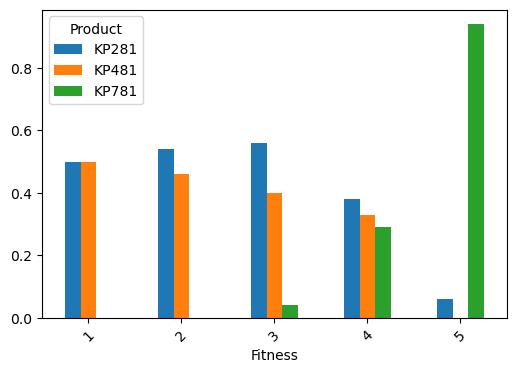

In [32]:
# Calculate conditional probability (P(Product | fitness rating))
conditional_prob = round(crosstab3.div(crosstab3.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (6,4))
plt.xticks(rotation=45)
plt.show()

94% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781

##### Marginal and Conditional Probability distribution for Product purchased and education years

In [33]:
crosstab4 = pd.crosstab(df['Education'], df['Product'])

marginal_prob = np.round(crosstab4 /crosstab4.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
Education,,,
12,0.02,0.02,0.00
13,0.04,0.03,0.00
14,0.38,0.38,0.05
15,0.05,0.02,0.00
16,0.49,0.52,0.38
18,0.02,0.03,0.48
20,0.00,0.00,0.02
21,0.00,0.00,0.08


Product    KP281  KP481  KP781
Education                     
12          0.67   0.33   0.00
13          0.60   0.40   0.00
14          0.55   0.42   0.04
15          0.80   0.20   0.00
16          0.46   0.36   0.18
18          0.09   0.09   0.83
20          0.00   0.00   1.00
21          0.00   0.00   1.00


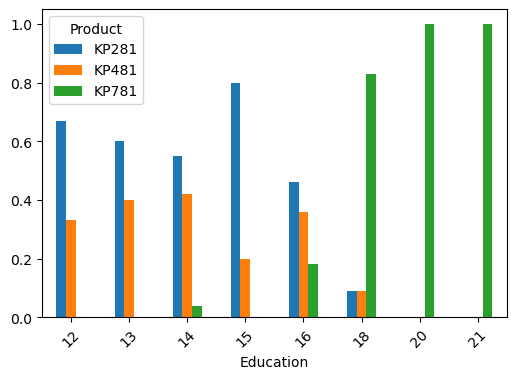

In [34]:
# Calculate conditional probability (P(Product | education))
conditional_prob = round(crosstab4.div(crosstab4.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (6,4))
plt.xticks(rotation=45)
plt.show()

83% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

##### Marginal and Conditional Probability distribution for Product purchased and marital status

In [35]:
crosstab5 = pd.crosstab(df['MaritalStatus'], df['Product'])

marginal_prob = np.round(crosstab5 /crosstab5.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.6,0.6,0.57
Single,0.4,0.4,0.42


Product        KP281  KP481  KP781
MaritalStatus                     
Partnered       0.45   0.34   0.21
Single          0.44   0.33   0.23


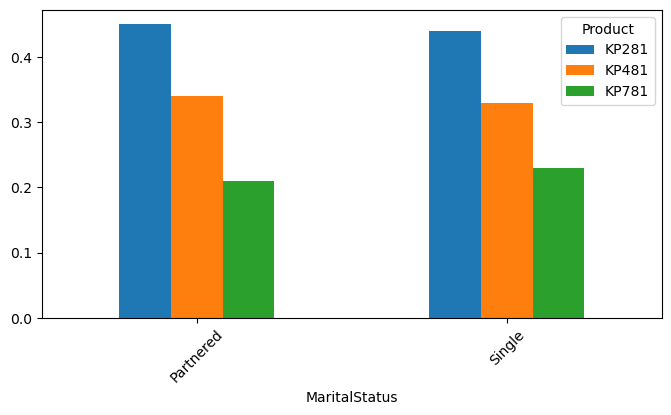

In [36]:
# Calculate conditional probability (P(Product | marital status))
conditional_prob = round(crosstab5.div(crosstab5.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (8,4))
plt.xticks(rotation=45)
plt.show()

Marital Status implies no significant information on the usages of different treadmills

##### Marginal and Conditional Probability distribution for Product purchased and weekly usage of product

In [37]:
crosstab6 = pd.crosstab(df['Usage'], df['Product'])

marginal_prob = np.round(crosstab6 /crosstab6.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
Usage,,,
2,0.24,0.23,0.00
3,0.46,0.52,0.02
4,0.28,0.20,0.45
5,0.02,0.05,0.30
6,0.00,0.00,0.18
7,0.00,0.00,0.05


Product  KP281  KP481  KP781
Usage                       
2         0.58   0.42   0.00
3         0.54   0.45   0.01
4         0.42   0.23   0.35
5         0.12   0.18   0.71
6         0.00   0.00   1.00
7         0.00   0.00   1.00


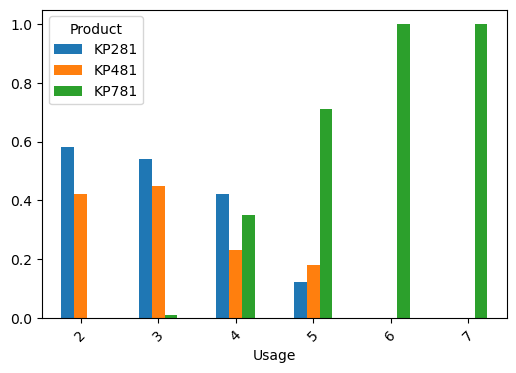

In [38]:
# Calculate conditional probability (P(Product | usage))
conditional_prob = round(crosstab6.div(crosstab6.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (6,4))
plt.xticks(rotation=45)
plt.show()

Those who workout 6 or 7 days a week use KP781 while 71% of those who workout 5 days a week use KP781.

##### Marginal and Conditional Probability distribution for Product purchased and income bins

In [39]:
crosstab7 = pd.crosstab(df['income_bins'], df['Product'])

marginal_prob = np.round(crosstab7 /crosstab7.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
income_bins,,,
29001 to 38999,0.26,0.15,0.00
39000 to 48999,0.34,0.35,0.08
49000 to 58999,0.31,0.35,0.20
59000 to 68999,0.09,0.15,0.12
69000 to 78999,0.00,0.00,0.12
79000 to 88999,0.00,0.00,0.12
89000 to 98999,0.00,0.00,0.25
99000 to 109000,0.00,0.00,0.10


Product          KP281  KP481  KP781
income_bins                         
29001 to 38999    0.70   0.30   0.00
39000 to 48999    0.53   0.41   0.06
49000 to 58999    0.46   0.39   0.15
59000 to 68999    0.33   0.43   0.24
69000 to 78999    0.00   0.00   1.00
79000 to 88999    0.00   0.00   1.00
89000 to 98999    0.00   0.00   1.00
99000 to 109000   0.00   0.00   1.00


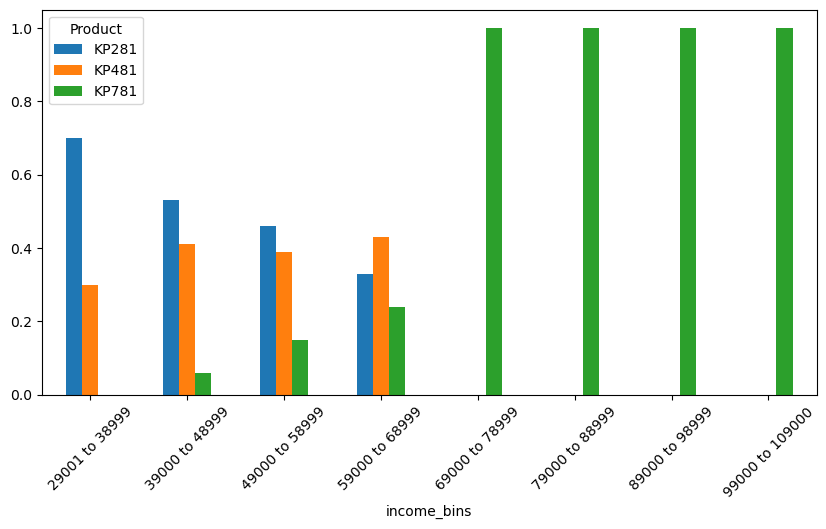

In [40]:
# Calculate conditional probability (P(Product | Income))
conditional_prob = round(crosstab7.div(crosstab7.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (10,5))
plt.xticks(rotation=45)
plt.show()

People having income >= 69000 units only preferred  KP781 while in Incomes below 39000, no one preferred KP781.

##### Marginal and Conditional Probability distribution for Product purchased and miles run on treadmill

In [41]:
crosstab8 = pd.crosstab(df['mile_bins'], df['Product'])

marginal_prob = np.round(crosstab8 /crosstab8.sum(),2)
marginal_prob

Product,KP281,KP481,KP781
mile_bins,,,
21 to 50,0.15,0.07,0.00
51 to 100,0.62,0.66,0.20
101 to 150,0.20,0.22,0.22
151 to 200,0.02,0.03,0.45
201 to 250,0.00,0.02,0.02
251 to 300,0.00,0.00,0.08
351 to 400,0.00,0.00,0.02


Product     KP281  KP481  KP781
mile_bins                      
21 to 50     0.75   0.25   0.00
51 to 100    0.52   0.40   0.08
101 to 150   0.42   0.34   0.24
151 to 200   0.09   0.09   0.82
201 to 250   0.00   0.50   0.50
251 to 300   0.00   0.00   1.00
351 to 400   0.00   0.00   1.00


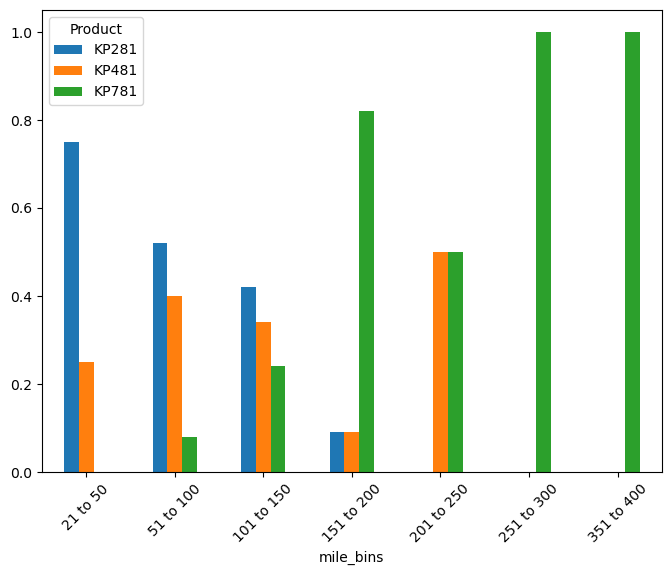

In [42]:
# Calculate conditional probability (P(Product | Miles))
conditional_prob = round(crosstab8.div(crosstab8.sum(axis=1), axis=0),2)
print (conditional_prob)
conditional_prob.plot(kind = 'bar', figsize = (8,6))
plt.xticks(rotation=45)
plt.show()

82% of people who run over 151 to 200 miles use KP781 and no one who runs below 50 miles use KP781. 
The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

##### Summary from above graphs and conditional probability tables:
    1. Overall probability of purchase of KP281 = 44.44%, KP481= 33.33% and KP781=22.22%
    2. (KP281|Education=12) = 67%, P(KP481|Education=14) = 42%
        P(KP781|Education=18) = 83%, P(KP781|Education=20) = P(KP781|Education=21) = 100%
    3. P(KP281|Usage=2) = 58%, P(KP481|Usage=3) = 45%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%
    4. P(KP481|Fitness=2) = 46%, P(KP781|Fitness=5) = 94%
    5. P(KP481|Age_bins=30 to 33) = 54%
    6. P(KP781|income_bins >69000) = 100% and P(KP481|income_bins=39000-48999) = 41%
    7. P(KP281|mile_bins 21 to 50) = 75% and P(KP781|mile_bins 151 to 200)=82%





### Correlation among all variables:

In [43]:
# Correlation between the columns of dataframe

df1=df.copy()

df1['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

df1['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

df1['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)
df1.corr()

C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_15296\3366927195.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Product,Age,Gender,MaritalStatus,Income,Miles
Product,1.000000,0.032225,-0.230653,-0.017602,0.624168,0.571596
Age,0.032225,1.000000,-0.027544,0.192152,0.513414,0.036618
Gender,-0.230653,-0.027544,1.000000,0.018836,-0.202053,-0.217869
MaritalStatus,-0.017602,0.192152,0.018836,1.000000,0.150293,0.025639
Income,0.624168,0.513414,-0.202053,0.150293,1.000000,0.543473
Miles,0.571596,0.036618,-0.217869,0.025639,0.543473,1.000000


C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_15296\241630713.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot = True, cmap = 'Blues')


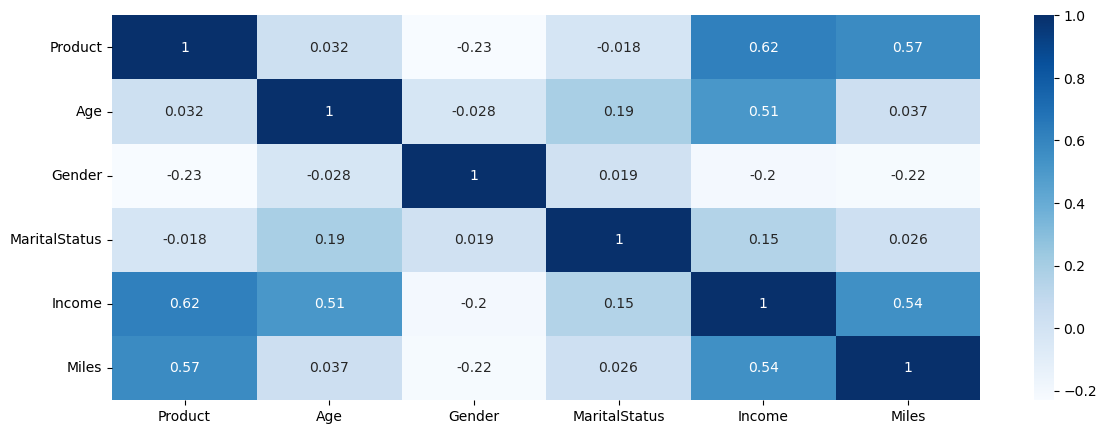

In [44]:
# Correlation Heatmap -

plt.figure(figsize=(14,5))
sns.heatmap(df1.corr(), annot = True, cmap = 'Blues')
plt.show()

##### Observations

1. The treadmill purchase strongly aligns with key factors such as Education, Income, Usage, Fitness, and Miles
2. Age exhibits a significant correlation with Income (0.51), a plausible relationship. Additionally, Age correlates with Education and Marital Status, aligning with expected patterns in consumer behavior.
3. Gender demonstrates correlations with Usage, Fitness, Income, and Miles, suggesting that gender plays a role in shaping preferences. Understanding these associations can help tailor marketing strategies.
4. Education is correlated with Age and Miles, and notably with Income. This aligns with expectations, reinforcing the idea that educational background influences purchasing decisions. Furthermore, Education shows noteworthy correlations with Usage and Fitness.
5. Marital Status shows correlations with Income and Age, as anticipated. This implies that marital status might influence financial decisions and, consequently, product choices.
6. Usage exhibits a strong correlation with Fitness and Miles, emphasizing the interconnected nature of these variables. Additionally, Usage demonstrates a notable correlation with Income, hinting at the financial aspect of fitness choices.
7. Fitness showcases a robust correlation with Income, underscoring the idea that financial well-being may contribute to a commitment to fitness. This insight can guide marketing strategies targeted at health-conscious demographics.

##### Other Possibilities:-
1. Product choice, Fitness, Usage, and Miles display exceptionally high correlations, reinforcing the narrative that increased product usage leads to more miles run and, subsequently, improved fitness levels.
2. Age and Education, primarily, serve as indicators of Income, which, in turn, influences treadmill preferences. The hypothesis is that advanced products attract higher income demographics, leading to elevated usage and enhanced fitness levels.

Note:- Above 2 points are just something which may or may not be true as Correlation doesn't imply Causation.


### Customer Profiling and Recommendations: 

In [45]:
for i in df['Product'].unique():
    product_profile = df[df['Product'] == i]
    customer_profile = product_profile.groupby(['Product']).agg({
        'Age': ['mean', 'median'],
        'Gender' : pd.Series.mode,
        'Income' : ['mean', 'median']
    })
    customer_profile.columns = ['Avg_Age', 'Median_Age', 'Most_Frequent_Gender', 'Avg_Income', 'Median_Income']
    print ('Profile for customers who purchased', i, 'is: ', '\n', customer_profile, '\n')

Profile for customers who purchased KP281 is:  
          Avg_Age  Median_Age Most_Frequent_Gender  Avg_Income  Median_Income
Product                                                                     
KP281      28.55        26.0       [Female, Male]   46418.025        46617.0 

Profile for customers who purchased KP481 is:  
          Avg_Age  Median_Age Most_Frequent_Gender  Avg_Income  Median_Income
Product                                                                     
KP481       28.9        26.0                 Male    48973.65        49459.5 

Profile for customers who purchased KP781 is:  
          Avg_Age  Median_Age Most_Frequent_Gender  Avg_Income  Median_Income
Product                                                                     
KP781       29.1        27.0                 Male   75441.575        76568.5 



##### For KP781
1. All the persons having incomes greater than 69k and who have run over 251 miles used KP781.
2. Recommend KP781 for the below mentioned conditions:
    1. Education Level >= 18 years (58% probability)
    2. Usage days per week > = 4 (98% probability)
    3. Fitness Levels = 5 (72% probability)
    4. The person runs more than 151 miles have 57% probability
    5. Income > 69000 (59% probability)
    6. Gender = male (82% probability) 

##### For KP281
1. Recommend KP281 for the below mentioned conditions:
    1. Education Level <= 16 years (98% probability)
    2. Usage days per week < = 3 (70 % probability)
    3. Fitness Levels = 2 to 3 (86% probability)
    4. People who run from 20 to 150 miles have 97% probability
    5. Income < 59000 (91% probability ) 
    6. Equal distribution for both gender

##### For KP481
1. Recommend KP481 for the below mentioned conditions:
    1. Education Level 14 to 16 years (92% probability)
    2. Usage days per week < = 3  (75 % probability)
    3. Fitness Levels = 2 to 3 (85% probability)
    4. People who run from 50 to 150 miles have 88% probability
    5. Income group from 29000 to 69000 have 100% probability 
    6. Gender = male (52% probability)
    
Note: There is much overlap for factors pertaining to KP281 and KP481